In [1]:
# import important lib's for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import matplotlib.cm as cm
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

sns.set_style("darkgrid")
init_notebook_mode(connected=True)
pd.set_option("display.max_columns", 100)

In [2]:
# import the clean csv file
fifa_16 = pd.read_csv("cleaned_fifa_16.csv")
fifa_17 = pd.read_csv("cleaned_fifa_17.csv")
fifa_18 = pd.read_csv("cleaned_fifa_18.csv")
fifa_19 = pd.read_csv("cleaned_fifa_19.csv")
fifa_20 = pd.read_csv("cleaned_fifa_20.csv")

In [3]:
# drop the first column called "Unnamed: 0"
fifa_20.drop(["Unnamed: 0"], axis = 1).reset_index(drop=True).head()

,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,95.5,565.0,Left,Yes,RM,10.0,87.0,92.0,92.0,96.0,39.0,66.0,70,94,96,91,84,1,0
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,58.5,405.0,Right,Yes,ST,7.0,90.0,93.0,82.0,89.0,35.0,78.0,89,76,92,89,91,1,1
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,105.5,290.0,Right,Yes,LM,10.0,91.0,85.0,87.0,95.0,32.0,58.0,62,87,95,94,89,1,1
3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,77.5,125.0,Right,Yes,GK,13.0,NaN,NaN,NaN,NaN,NaN,NaN,15,14,30,43,60,1,1
4,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,90.0,470.0,Right,Yes,LM,7.0,91.0,83.0,86.0,94.0,35.0,66.0,61,79,94,94,88,1,1


In [4]:
def plot_chart(X, y, y_pred, x_l, x_h, y_l, y_h, c):
    plt.figure(figsize = (15,10))
    plt.scatter(X, y, color=c)
    plt.plot(X, y_pred, color='blue', linewidth=3)

In [5]:
fifa_20 = fifa_20[fifa_20['wage_K'] != 0]
X_2 = fifa_20['rating'].values.reshape(-1,1)
y_2 = fifa_20['wage_K'].values.reshape(-1,1)

poly = PolynomialFeatures(degree=2)
X_2_p = poly.fit_transform(X_2)
clf = linear_model.LinearRegression().fit(X_2_p, y_2)
y_2_pred = clf.predict(X_2_p)

print('Coefficients: ', clf.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y_2, y_2_pred))
print('Variance score: %.2f'% r2_score(y_2, y_2_pred))

Coefficients:  [[  0.         -20.59468741   0.16839078]]
Mean squared error: 169.01
Variance score: 0.63


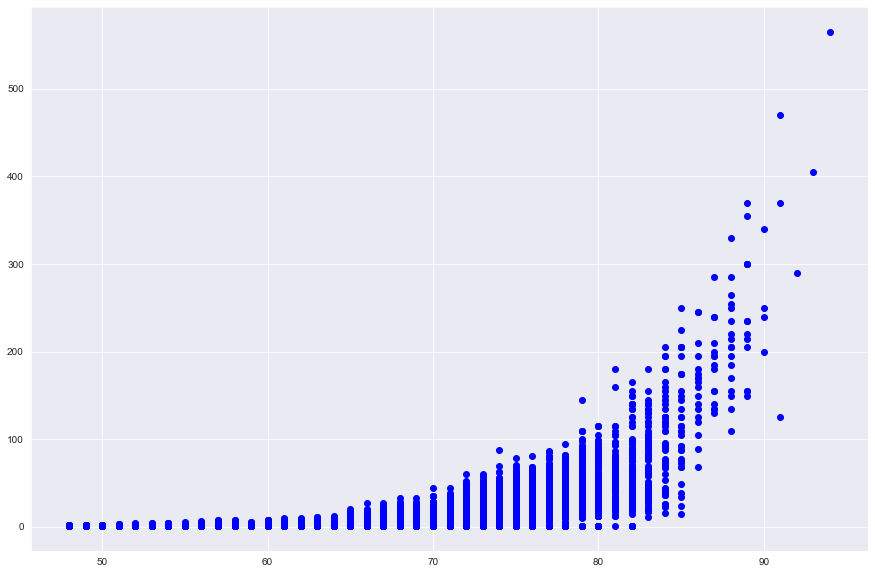

In [6]:
fifa_20 = fifa_20[fifa_20['wage_K'] != 0]
X_2 = fifa_20['rating'].values.reshape(-1,1)
y_2 = fifa_20['wage_K'].values.reshape(-1,1)
c = fifa_20['position'].map(color_dict)
plt.figure(figsize = (15,10))
plt.scatter(X_2, y_2, color='b');

In [7]:
fifa_20 = fifa_20[fifa_20['wage_K'] != 0]
x = fifa_20['rating'].values.reshape(-1,1)
y = fifa_20['wage_K'].values.reshape(-1,1)

In [8]:
fifa_20.head()

,Unnamed: 0,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right
0,0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,95.5,565.0,Left,Yes,RM,10.0,87.0,92.0,92.0,96.0,39.0,66.0,70,94,96,91,84,1,0
1,1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,58.5,405.0,Right,Yes,ST,7.0,90.0,93.0,82.0,89.0,35.0,78.0,89,76,92,89,91,1,1
2,2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,105.5,290.0,Right,Yes,LM,10.0,91.0,85.0,87.0,95.0,32.0,58.0,62,87,95,94,89,1,1
3,3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,77.5,125.0,Right,Yes,GK,13.0,NaN,NaN,NaN,NaN,NaN,NaN,15,14,30,43,60,1,1
4,4,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,90.0,470.0,Right,Yes,LM,7.0,91.0,83.0,86.0,94.0,35.0,66.0,61,79,94,94,88,1,1


In [9]:
fifa_16.isna().sum()

Unnamed: 0                 0
id                         0
name                       0
age                        0
height                     0
weight                     0
nationality                0
club                       0
rating                     0
value_M                    0
wage_K                     0
preferred_foot             0
real_face                  0
position                   0
jersey_number            171
pace                    1618
shooting                1618
passing                 1618
dribbling               1618
defending               1618
physic                  1618
heading                    0
free_kick                  0
ball_control               0
acceleration               0
speed                      0
real_face_Yes              0
preferred_foot_Right       0
dtype: int64

In [10]:
fifa_16.dtypes

Unnamed: 0                int64
id                        int64
name                     object
age                       int64
height                    int64
weight                    int64
nationality              object
club                     object
rating                    int64
value_M                 float64
wage_K                  float64
preferred_foot           object
real_face                object
position                 object
jersey_number           float64
pace                    float64
shooting                float64
passing                 float64
dribbling               float64
defending               float64
physic                  float64
heading                   int64
free_kick                 int64
ball_control              int64
acceleration              int64
speed                     int64
real_face_Yes             int64
preferred_foot_Right      int64
dtype: object

In [11]:
fifa_20.head()

,Unnamed: 0,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right
0,0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,95.5,565.0,Left,Yes,RM,10.0,87.0,92.0,92.0,96.0,39.0,66.0,70,94,96,91,84,1,0
1,1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,58.5,405.0,Right,Yes,ST,7.0,90.0,93.0,82.0,89.0,35.0,78.0,89,76,92,89,91,1,1
2,2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,105.5,290.0,Right,Yes,LM,10.0,91.0,85.0,87.0,95.0,32.0,58.0,62,87,95,94,89,1,1
3,3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,77.5,125.0,Right,Yes,GK,13.0,NaN,NaN,NaN,NaN,NaN,NaN,15,14,30,43,60,1,1
4,4,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,90.0,470.0,Right,Yes,LM,7.0,91.0,83.0,86.0,94.0,35.0,66.0,61,79,94,94,88,1,1


In [12]:
fifa_20 = pd.concat([fifa_16, pd.get_dummies(fifa_16["preferred_foot"], prefix="preferred_foot", drop_first=True)], axis=1 )

In [13]:
fifa_20.assign(const=1)

,Unnamed: 0,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right,preferred_foot_Right,const
0,0,158023,L. Messi,28,170,72,Argentina,FC Barcelona,94,111.00,550.0,Left,Yes,RM,10.0,92.0,88.0,86.0,95.0,24.0,62.0,71,90,96,95,90,1,0,0,1
1,1,20801,Cristiano Ronaldo,30,185,80,Portugal,Real Madrid,93,85.50,475.0,Right,Yes,LM,7.0,92.0,93.0,80.0,91.0,33.0,78.0,86,77,91,91,93,1,1,1,1
2,2,9014,A. Robben,31,180,80,Netherlands,FC Bayern München,90,56.00,250.0,Left,Yes,RM,10.0,92.0,86.0,82.0,92.0,32.0,64.0,51,83,90,92,92,1,0,0,1
3,3,167495,M. Neuer,29,193,92,Germany,FC Bayern München,90,58.00,250.0,Right,Yes,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,25,11,31,58,61,1,1,1,1
4,4,176580,L. Suárez,28,182,85,Uruguay,FC Barcelona,90,69.00,300.0,Right,Yes,ST,9.0,83.0,88.0,79.0,87.0,42.0,79.0,77,84,91,88,78,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,14876,224867,R. Horne,19,180,76,England,Cambridge United,44,0.06,1.0,Right,No,CM,28.0,63.0,40.0,43.0,47.0,39.0,52.0,39,41,42,67,60,0,1,1,1
14877,14877,229852,C. Shephard,17,173,69,Wales,Newport County,44,0.05,1.0,Right,No,CM,42.0,69.0,34.0,44.0,49.0,32.0,46.0,35,37,43,68,70,0,1,1,1
14878,14878,227910,L. Gooch,17,181,65,England,Luton Town,44,0.04,1.0,Right,No,GK,37.0,NaN,NaN,NaN,NaN,NaN,NaN,14,17,23,42,41,0,1,1,1
14879,14879,225339,S. Warburton,18,171,64,England,Northampton Town,44,0.03,1.0,Left,No,LB,29.0,58.0,28.0,32.0,45.0,43.0,45.0,39,28,35,62,55,0,0,0,1


In [15]:
y = fifa_20['value_M'].values.reshape(-1,1)

X = fifa_20['preferred_foot_Right'].values.reshape(-1,1)

regr = linear_model.LinearRegression().fit(X,y)
y_pred = regr.predict(X)

print('Coefficients: ', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [29762, 14881]

In [16]:
def plot_chart(X, y, y_pred, c):
    plt.figure(figsize = (15,10))
    plt.scatter(X, y, c =c)
    plt.plot(X, y_pred, c ='gray', linewidth=3)
    plt.title('Preferred foot vs Value')
    plt.ylabel('Value (Million)')
    plt.xlabel('Preferred foot')
plot_chart(X, y, y_pred,'lightblue')

NameError: name 'y_pred' is not defined

In [ ]:
y = fifa_20["value_M"].values.reshape(-1,1)

X = fifa_20["wage_K"].values.reshape(-1,1)

regr = linear_model.LinearRegression().fit(X,y)
y_pred = regr.predict(X)

print('Coefficients: ', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))


In [17]:
def plot_chart(X, y, y_pred, c):
    plt.figure(figsize = (15,10))
    plt.scatter(X, y, c =c)
    plt.plot(X, y_pred, c ='gray', linewidth=3)
    plt.title('Wage vs Value')
    plt.ylabel('Value (Million)')
    plt.xlabel('Wage')
plot_chart(X, y, y_pred,'lightblue')

NameError: name 'y_pred' is not defined

In [18]:
fifa_20 = fifa_20.assign(const=1)

In [19]:
variables = ["wage_K", "rating"]
fifa_20.head()

,Unnamed: 0,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right,preferred_foot_Right,const
0,0,158023,L. Messi,28,170,72,Argentina,FC Barcelona,94,111.0,550.0,Left,Yes,RM,10.0,92.0,88.0,86.0,95.0,24.0,62.0,71,90,96,95,90,1,0,0,1
1,1,20801,Cristiano Ronaldo,30,185,80,Portugal,Real Madrid,93,85.5,475.0,Right,Yes,LM,7.0,92.0,93.0,80.0,91.0,33.0,78.0,86,77,91,91,93,1,1,1,1
2,2,9014,A. Robben,31,180,80,Netherlands,FC Bayern München,90,56.0,250.0,Left,Yes,RM,10.0,92.0,86.0,82.0,92.0,32.0,64.0,51,83,90,92,92,1,0,0,1
3,3,167495,M. Neuer,29,193,92,Germany,FC Bayern München,90,58.0,250.0,Right,Yes,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,25,11,31,58,61,1,1,1,1
4,4,176580,L. Suárez,28,182,85,Uruguay,FC Barcelona,90,69.0,300.0,Right,Yes,ST,9.0,83.0,88.0,79.0,87.0,42.0,79.0,77,84,91,88,78,1,1,1,1


In [21]:

X = fifa_20[['const'] + variables]
y = fifa_20['preferred_foot_Right']
log_reg = sm.Logit(y, X).fit()

ValueError: operands could not be broadcast together with shapes (14881,2) (14881,) 

In [ ]:
X = fifa_20[['const'] + ['value_M']]
y = fifa_20['preferred_foot_Right']
log_reg = sm.Logit(y, X).fit()

In [ ]:
log_reg.summary()

In [ ]:
sns.regplot(x="value_M", y="preferred_foot_Right", data=fifa_20, logistic=True);

In [ ]:
fifa_20.head()

In [ ]:
X = fifa_20[["const"] + ["value_M"]]
y = fifa_20["real_face_Yes"]
log_reg = sm.Logit(y, X).fit()

In [ ]:
log_reg.summary()

In [ ]:
sns.regplot(x="value_M", y="real_face_Yes", data=fifa_20, logistic=True);

In [ ]:
fifa_20["position"].value_counts()

In [ ]:
#The Overall Rating
plt.figure(figsize=(18,10))
sns.countplot(fifa_20['rating'], palette='rocket')
plt.show();

In [ ]:
#ax, fig = plt.subplots(figsize=(16,9))
sns.jointplot(x=fifa_20["rating"], y=fifa_20["value_M"], data=fifa_20, height=16);

In [ ]:
# Dream team within budget
## boxplots for ages vrs value_M
### position vrs value_M
#### rating vrs value_M 


In [ ]:
# formation will be 4-3-3
## CF, ST, LW, RW, CM, LM, RM, RCB, LCB, RDM, LDM, LB, RB, GK
## CF = ST , LW = LDM = LM , RW = RDM = RM, CM = CDM = CAM , RCB = LCB, 

In [ ]:
## ammount of players in the dream team

#CM    1
#CB    2
#ST    1
#GK    1
#LM    2
#RB    1
#RM    2
#LB    1

In [ ]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="rating", y="value_M", data=fifa_20, fit_reg=False, hue='position', legend=True, height=16);
# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')


In [ ]:
# specifications 80-90 overall rating and 18-30 M per player 
sns.lmplot( x="rating", y="value_M", data=fifa_20, fit_reg=False, hue='position', legend=True, height=16);
plt.ylim(0,33);
plt.xlim(75,91);

In [ ]:
fifa_20 = pd.read_csv("cleaned_fifa_20.csv")

In [ ]:
fifa_20_young = fifa_20.loc[fifa_20["age"] < 26] 

In [ ]:
fifa_20_young = fifa_20_young.loc[fifa_20_young['value_M'] <= 30.00]

In [ ]:
fifa_20_young = fifa_20_young[fifa_20_young1['rating'].between( 80, 91)] 

In [ ]:
fifa_20_young.drop(["Unnamed: 0"],axis = 1).reset_index(drop=True)
fifa_20_young.to_csv("fifa_20_young.csv")

In [ ]:
sns.lmplot( x="rating", y="value_M", data=fifa_20, fit_reg=False, hue='position', legend=True, height=16);
plt.ylim(0,33);
plt.xlim(79.5,91);